In [1]:
# 导入需要使用的包
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
from pandas import Series, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<ipython-input-1-4196427013a1>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Series, datetime


# 1 导入数据

## 1） 导入新闻文本数据

In [2]:
# 导入数据
sentence_file = "sentence_emotion_analyse/combined_stock_data.csv"
sentence_df = pd.read_csv(sentence_file, parse_dates=[1])

In [3]:
sentence_df.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",85.714286,14.285714,21.428571,14.285714,64.285714
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,77.777778,22.222222,33.333333,22.222222,44.444444
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,53.333333,46.666667,20.000000,46.666667,33.333333
3,3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,40.000000,60.000000,20.000000,60.000000,20.000000
4,4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,45.454545,54.545455,36.363636,54.545455,9.090909


In [4]:
# 数据类型
print(sentence_df.shape)
print(sentence_df.dtypes)

(1989, 34)
Unnamed: 0               int64
Date            datetime64[ns]
Label                    int64
Top1                    object
Top2                    object
Top3                    object
Top4                    object
Top5                    object
Top6                    object
Top7                    object
Top8                    object
Top9                    object
Top10                   object
Top11                   object
Top12                   object
Top13                   object
Top14                   object
Top15                   object
Top16                   object
Top17                   object
Top18                   object
Top19                   object
Top20                   object
Top21                   object
Top22                   object
Top23                   object
Top24                   object
Top25                   object
Para                    object
Subjectivity           float64
Objectivity            float64
Positive               float

## 2）导入股票数据

In [5]:
# 价格序列
stock_prices = "sentence_emotion_analyse/stocknews/DJIA_table.csv"
stock_data = pd.read_csv(stock_prices, parse_dates=[0])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [6]:
# 数据类型
print(stock_data.shape)
print(stock_data.dtypes)

(1989, 7)
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


## 3）合并数据

In [7]:
# 合并标题和股票价格
merged_dataframe = sentence_df[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)

print(merged_dataframe.shape)
merged_dataframe.head()

(1989, 13)


,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,85.714286,14.285714,21.428571,64.285714,14.285714,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,77.777778,22.222222,33.333333,44.444444,22.222222,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,53.333333,46.666667,20.000000,33.333333,46.666667,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,40.000000,60.000000,20.000000,20.000000,60.000000,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [8]:
# 把label放在最后一列
cols = list(merged_dataframe)
print(cols)
cols.append(cols.pop(cols.index('Label')))
merged_dataframe = merged_dataframe.loc[:, cols]
merged_dataframe.head()

['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
1988,2008-08-08,85.714286,14.285714,21.428571,64.285714,14.285714,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
1987,2008-08-11,77.777778,22.222222,33.333333,44.444444,22.222222,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
1986,2008-08-12,53.333333,46.666667,20.000000,33.333333,46.666667,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
1985,2008-08-13,40.000000,60.000000,20.000000,20.000000,60.000000,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
1984,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


In [9]:
# 把Volume的数据类型改成float
#merged_dataframe['Date'] = pd.to_datetime(merged_dataframe['Date'])
merged_dataframe['Volume'] = merged_dataframe['Volume'].astype(float)
print(cols)
merged_dataframe.index = merged_dataframe.index.sort_values()
merged_dataframe.head()

['Date', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
0,2008-08-08,85.714286,14.285714,21.428571,64.285714,14.285714,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,0
1,2008-08-11,77.777778,22.222222,33.333333,44.444444,22.222222,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,1
2,2008-08-12,53.333333,46.666667,20.000000,33.333333,46.666667,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,0
3,2008-08-13,40.000000,60.000000,20.000000,20.000000,60.000000,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,0
4,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,1


In [10]:
# 把 NaN 值更改为该列的平均值 
nan_list = ['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']
for col in nan_list:
    merged_dataframe[col] = merged_dataframe[col].fillna(merged_dataframe[col].mean())

# 最大的不同：以今天预测明天（改变LABEL）

In [11]:
# 把label挪动1格（以今天预测明天）
labels = merged_dataframe.Label[:]
merged_dataframe = merged_dataframe[:-1]
merged_dataframe.Label = labels

# 2 特征筛选与模型求解

In [12]:
X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']

# 70% 训练集  30% 测试集
train_size = int(len(X.index) * 0.7)

X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
y_train, y_test = y[0:train_size+1], y.loc[train_size: len(X.index)]

print('总数: %d' % (len(X.index)))
print('X 训练数目: %d' % (len(X_train.index)))
print('X 测试数目: %d' % (len(X_test.index)))
print('y 训练数目: %d' % (len(y_train)))
print('y 测试数目: %d' % (len(y_test)))

总数: 1988
X 训练数目: 1392
X 测试数目: 597
y 训练数目: 1392
y 测试数目: 597


## 2.1 LDA

In [13]:
# LDA
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)

# 在X_test上估计
rescaledValidationX = scaler.transform(X_test)

predictions = model_lda.predict(rescaledValidationX)


print("accuracy score:")
print(accuracy_score(y_test, predictions))
print('-----------')
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print('-----------')
print("classification report: ")
print(classification_report(y_test, predictions))
print('-----------')

accuracy score:
0.9530988274706867
-----------
confusion matrix: 
[[259  22]
 [  6 310]]
-----------
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       281
           1       0.93      0.98      0.96       316

    accuracy                           0.95       597
   macro avg       0.96      0.95      0.95       597
weighted avg       0.95      0.95      0.95       597

-----------


roc auc is :0.9946168746339925


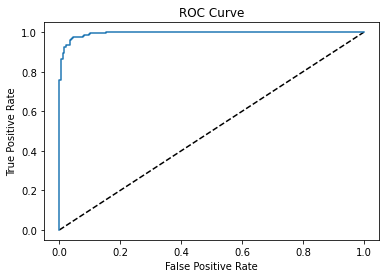

AUC using cross val: [0.99776786 0.99074074 0.96428571 0.9841629  0.99665179 0.99221357
 1.         0.98611111 0.99176471 0.97569444]
-----------
Mean AUC score is: 0.9879392825883146


E:\download\anaconda\download\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [14]:
# ROC
y_pred_proba = model_lda.predict_proba(rescaledValidationX)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC
kfold_val = KFold(n_splits=10, random_state=42)
auc_score = cross_val_score(model_lda, X_test, y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
print('-----------')
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

In [15]:
# 设置显示字体等，中文表示
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

E:\download\anaconda\download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

E:\download\anaconda\download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



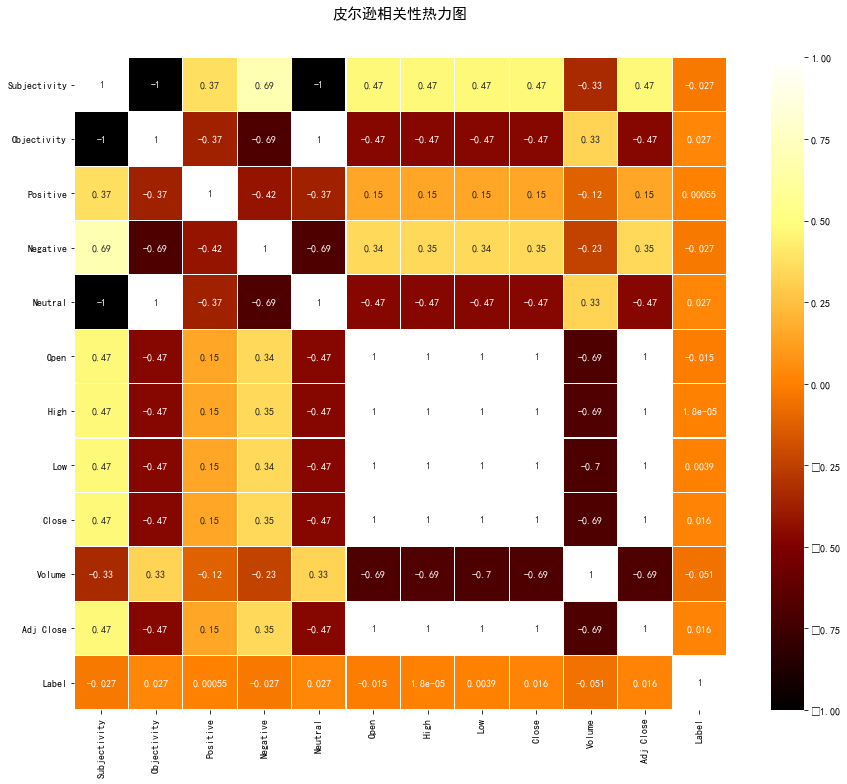

In [16]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('皮尔逊相关性热力图', y=1.05, size=15)
sns.heatmap(merged_dataframe.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, annot=True)
pyplot.show()

保留的特征为：“Subjectivity”、“Volume”、“Adj Close”。

In [17]:
X_train.columns

Index(['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral',
       'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'],
      dtype='object')

In [18]:
# LDA
scaler = StandardScaler().fit(X_train[['Subjectivity','Volume','Volume']])
rescaledX = scaler.transform(X_train[['Subjectivity','Volume','Volume']])

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)

# 在X_test上估计
rescaledValidationX = scaler.transform(X_test[['Subjectivity','Volume','Volume']])
predictions = model_lda.predict(rescaledValidationX)

print("accuracy score:")
print(accuracy_score(y_test, predictions))
print('-----------')
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print('-----------')
print("classification report: ")
print(classification_report(y_test, predictions))
print('-----------')

accuracy score:
0.5293132328308208
-----------
confusion matrix: 
[[  4 277]
 [  4 312]]
-----------
classification report: 
              precision    recall  f1-score   support

           0       0.50      0.01      0.03       281
           1       0.53      0.99      0.69       316

    accuracy                           0.53       597
   macro avg       0.51      0.50      0.36       597
weighted avg       0.52      0.53      0.38       597

-----------


roc auc is :0.5754425875039416


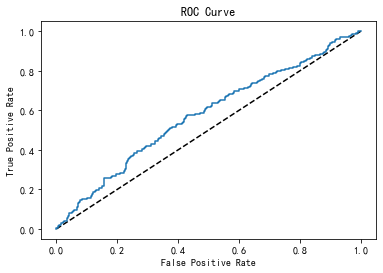

AUC using cross val: [0.54799107 0.66550926 0.58928571 0.61199095 0.50111607 0.60845384
 0.59263393 0.48958333 0.54352941 0.54861111]
-----------
Mean AUC score is: 0.5698704689006269


E:\download\anaconda\download\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [19]:
# ROC
y_pred_proba = model_lda.predict_proba(rescaledValidationX)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC
kfold_val = KFold(n_splits=10, random_state=42)
auc_score = cross_val_score(model_lda, X_test[['Subjectivity','Volume','Volume']], y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
print('-----------')
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

## 2.2 XGboost

In [20]:
# XGBoost
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)

# 在X_test上估计
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)

print("accuracy score:")
print(accuracy_score(y_test, predictions))
print('-----------')
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print('-----------')
print("classification report: ")
print(classification_report(y_test, predictions))
print('-----------')

E:\download\anaconda\download\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score:
0.5862646566164154
-----------
confusion matrix: 
[[ 69 212]
 [ 35 281]]
-----------
classification report: 
              precision    recall  f1-score   support

           0       0.66      0.25      0.36       281
           1       0.57      0.89      0.69       316

    accuracy                           0.59       597
   macro avg       0.62      0.57      0.53       597
weighted avg       0.61      0.59      0.54       597

-----------


roc auc is :0.5735562412721293


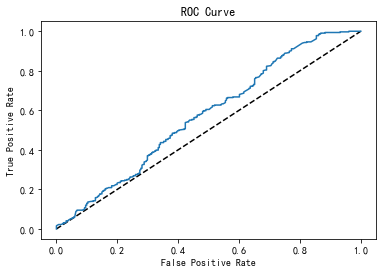

AUC using cross val: [0.54799107 0.66550926 0.58928571 0.61199095 0.50111607 0.60845384
 0.59263393 0.48958333 0.54352941 0.54861111]
-----------
Mean AUC score is: 0.5698704689006269


E:\download\anaconda\download\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [21]:
# ROC
y_pred_proba = model_xgb.predict_proba(rescaledValidationX)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC
kfold_val = KFold(n_splits=10, random_state=42)
auc_score = cross_val_score(model_lda, X_test[['Subjectivity','Volume','Volume']], y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
print('-----------')
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

In [22]:
features = merged_dataframe.drop(['Label','Date'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(model_xgb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='在XGBoost中特征的重要性',
    orientation='h',
)

layout = dict(
    title='在XGBoost中特征的重要性',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

#### 微调XGboost

In [23]:
# XGBoost：在股票价格数据集上，调整 n_estimators 和 max_depth 
import matplotlib
matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[12:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.576214405360134 at depth of 1 and estimator 150
[12:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

E:\download\anaconda\download\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




Score is 0.5946398659966499 at depth of 2 and estimator 150
[12:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.5946398659966499 at depth of 3 and estimator 150
[12:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.6030150753768844 at depth of 4 and estimator 150
[12:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

Score is 0.576214405360134 at depth of 1 and estimator 250
[12:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.5963149078726968 at depth of 2 and estimator 250
[12:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.6046901172529313 at depth of 3 and estimator 250
[12:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' 

Score is 0.542713567839196 at depth of 12 and estimator 450
[12:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.5745393634840871 at depth of 1 and estimator 500
[12:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.5963149078726968 at depth of 2 and estimator 500
[12:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

Score is 0.5644891122278057 at depth of 11 and estimator 550
[12:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.5460636515912898 at depth of 12 and estimator 550
[12:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score is 0.5812395309882747 at depth of 1 and estimator 1000
[12:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

#### 特征筛选

In [24]:
# 只选择重要的、并调参：XGBoost
scaler = StandardScaler().fit(X_train[['Neutral','Low','High','Objectivity','Close','Open','Positive']])
rescaledX = scaler.transform(X_train[['Neutral','Low','High','Objectivity','Close','Open','Positive']])

model_xgb = XGBClassifier(n_estimators = 450, max_depth = 3)
model_xgb.fit(rescaledX, y_train)

# 在X_test上估计
rescaledValidationX = scaler.transform(X_test[['Neutral','Low','High','Objectivity','Close','Open','Positive']])
predictions = model_xgb.predict(rescaledValidationX)

print("accuracy score:")
print(accuracy_score(y_test, predictions))
print('-----------')
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print('-----------')
print("classification report: ")
print(classification_report(y_test, predictions))
print('-----------')

[12:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\download\anaconda\download\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



accuracy score:
0.6013400335008375
-----------
confusion matrix: 
[[ 46 235]
 [  3 313]]
-----------
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.16      0.28       281
           1       0.57      0.99      0.72       316

    accuracy                           0.60       597
   macro avg       0.75      0.58      0.50       597
weighted avg       0.74      0.60      0.51       597

-----------


roc auc is :0.6352482093788009
AUC using cross val: [0.54799107 0.66550926 0.58928571 0.61199095 0.50111607 0.60845384
 0.59263393 0.48958333 0.54352941 0.54861111]

<ipython-input-25-d6224a010d3b>:13: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

E:\download\anaconda\download\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.




-----------
Mean AUC score is: 0.5698704689006269


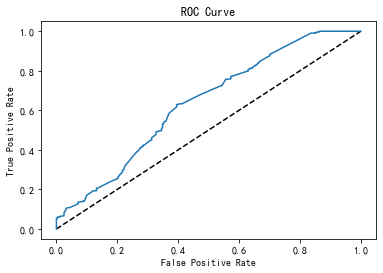

In [25]:
# ROC
y_pred_proba = model_xgb.predict_proba(rescaledValidationX)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC
kfold_val = KFold(n_splits=10, random_state=42)
auc_score = cross_val_score(model_lda, X_test[['Subjectivity','Volume','Volume']], y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
print('-----------')
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

#### PCA

In [26]:
# 设置显示字体等，中文表示
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

<ipython-input-27-4db595000540>:20: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



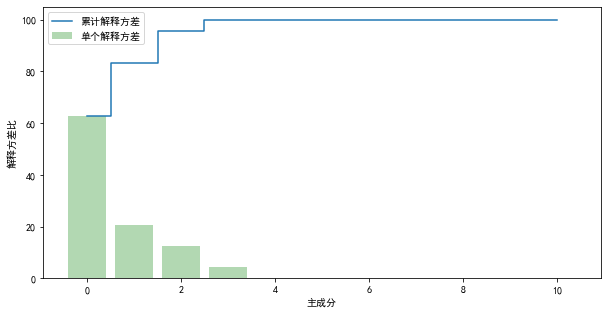

In [27]:
data = X
X = data.values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) 

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='单个解释方差', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='累计解释方差')
plt.ylabel('解释方差比')
plt.xlabel('主成分')
plt.legend(loc='best')
plt.show()

3个主成分可以比较好的代替原来的属性，实际上，2个主成分就可以达到80%以上。

In [28]:
pca = PCA(n_components=3)
pca.fit(X)
transformed = pca.transform(X)

transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


In [29]:
pca_df = pd.DataFrame(transformed)

X_train_pca, X_test_pca = pca_df.loc[0:train_size, :], pca_df.loc[train_size: len(X), :]

clf = XGBClassifier(n_estimators=450, max_depth=3)
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred_pca)
print("Score is "+ str(score))

[12:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\download\anaconda\download\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Score is 0.9413735343383585


In [30]:
pca_matrix = confusion_matrix(y_test, y_pred_pca)
pca_report = classification_report(y_test, y_pred_pca)
print("Confusion Matrix: \n" + str(pca_matrix))
print("Classification report: \n" + str(pca_report))

Confusion Matrix: 
[[260  21]
 [ 14 302]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       281
           1       0.93      0.96      0.95       316

    accuracy                           0.94       597
   macro avg       0.94      0.94      0.94       597
weighted avg       0.94      0.94      0.94       597



AUC score is 0.9847571962701023
roc auc is :0.9847571962701023


<ipython-input-31-48f75b7105a1>:14: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



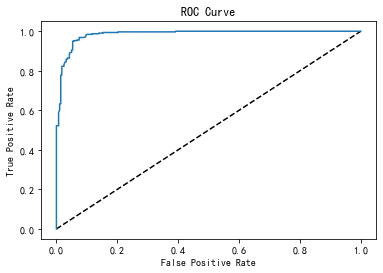

In [31]:
# ROC
y_pred_proba_pca = clf.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)
roc_auc = auc(fpr, tpr)
print("AUC score is " + str(roc_auc))

# ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()
